# Sampling Continuous Univariate Distributions

In this notebook, we'll look at how to sample from two different continuous univariate distributions using the SciPy library, notably the `scipy.stats` module. SciPy builds on NumPy, with more sophisticated functionality for statistics, linear algebra, etc. but at slower computational speed (e.g. for basic algorithms like sorting).  

The two distributions examined are for uniform and normal (Gaussian) random variables.

Before proceeding, let's import the necessary modules for this notebook:

In [1]:
import matplotlib.pyplot as plt # For general plotting
import numpy as np
from scipy.stats import norm, uniform

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)

# Number of samples to draw from each distribution
N = 1000

## Uniform Distribution

The uniform distribution has the following probability density function (PDF):
\begin{equation}
X \sim \text{Uniform}(a, b) \quad p_X(x) = \begin{cases}
  \displaystyle \frac{1}{b-a} & \text{for} \, x \in [a,b] \\
  0 & \text{otherwise}
\end{cases}
\end{equation}

Draw $N=1000$ samples from three different univariate uniform distributions to illustrate the effect on the PDF of parameters $a$ and $b$:

\begin{equation}
X_1 \sim \text{Uniform}(1, 5)
\end{equation}
\begin{equation}
X_2 \sim \text{Uniform}(5, 10)
\end{equation}
\begin{equation}
X_3 \sim \text{Uniform}(-10, -3)
\end{equation}

Reminder that we cannot draw exact probabilities from continuous random variables, and instead evaluate intervals. Therefore, we will first reate evenly spaced numbers to partition the sample space of each distribution into intervals. We'll use the same $x$ set of values to define all three PDFs (making sure they cover the full range):

In [2]:
x = np.linspace(start=-20, stop=20, num=N)

Then compute the uniform density functions for these three distributions, using SciPy's `stats.uniform` object. Note that it takes `loc` and `scale`, which are equivalent to $a$ and $b$ as `[loc, loc+scale]`:

In [3]:
p_x1 = uniform.pdf(x, 1, 4)
p_x2 = uniform.pdf(x, 5, 5)
p_x3 = uniform.pdf(x, -10, 7) # Note the loc+scale, replacing the 'b' parameter

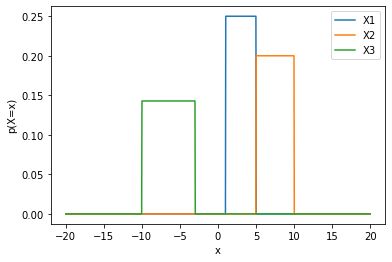

In [4]:
plt.plot(x, p_x1, label='X1')
plt.plot(x, p_x2, label='X2')
plt.plot(x, p_x3, label='X3')

# Add labels
plt.xlabel("x")
plt.ylabel("p(X=x)")
 
plt.legend()
plt.show()

## Normal Distribution

The normal uniform distribution has the following PDF:
\begin{equation}
X \sim \mathcal{N}(\mu, \sigma^2) \quad p_X(x) = 
  \displaystyle \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

Let's now draw $N=1000$ samples from four different univariate Gaussian (normal) distributions to illustrate the effect of parameters $\mu$ and $\sigma^2$:

\begin{equation}
X_1 \sim N(0, 0.2)
\end{equation}
\begin{equation}
X_2 \sim N(0, 5)
\end{equation}
\begin{equation}
X_3 \sim N(-2, 0.5)
\end{equation}
\begin{equation}
Z \sim N(0, 1)
\end{equation}

Last random variable, $Z$, is a special case known as the standard normal distribution, where the mean is 0 and the standard deviation is 1.

Again define a set of $x$ values to span the space of all four distributions.

In [5]:
x = np.linspace(start=-15, stop=15, num=N)

Similarly to before, compute the corresponding four normal density functions, now using SciPy's  `stats.norm` object. Note that it similarly takes `loc` and `scale`, however these parameters now represent $mu$ and $\sigma$, respectively.

In [6]:
p_x1 = norm.pdf(x, 0, 0.2**0.5) # Note I'm providing std. dev. NOT variance
p_x2 = norm.pdf(x, 0, 5**0.5) # Hence the ^0.5 written as **5 in Python
p_x3 = norm.pdf(x, -2, 0.5**0.5) 
p_z = norm.pdf(x, 0, 1)

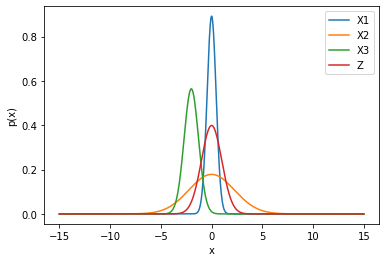

In [7]:
plt.plot(x, p_x1, label='X1')
plt.plot(x, p_x2, label='X2')
plt.plot(x, p_x3, label='X3')
plt.plot(x, p_z, label='Z')

# Add labels
plt.xlabel("x")
plt.ylabel("p(x)")
 
plt.legend()
plt.show()